# Homework 1

## Question 6

In [1]:
#Load the file numbers.mat. The variable `mat' is an image. Treat this image
# as a data matrix Xd and apply SVD to it.

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import pandas as pd

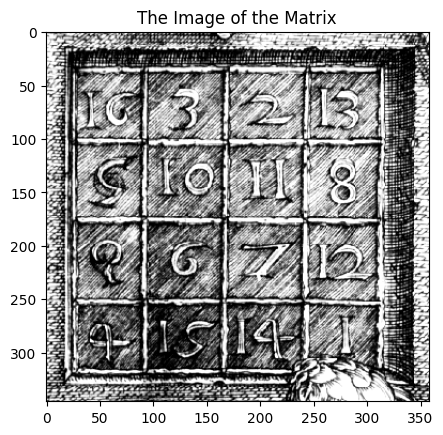

In [14]:
# load the data
mat = sio.loadmat('numbers.mat')
# len(mat['mat'])
data = mat['mat']
# Plotting the original matrix
plt.imshow(data, cmap='gray')
plt.title(f'The Image of the Matrix')
plt.show()

### (0) Applying SVD
To apply SVD to the data in Python, we will use the `scipy.linalg` module.
We call the `svd` function to decompose our matrix.

The function returns three matrices $U$, $Σ$ (Sigma), and $V^T$, where $U$ and $V$ are unitary matrices, and $Σ$ is a diagonal matrix of singular values.


In [15]:
import scipy.linalg

# Applying SVD
U, sigma, VT = scipy.linalg.svd( data)
# U, sigma, VT are the decomposed matrices


- `U`: Contains the left singular vectors.
- `sigma`: Contains the singular values. Note that `sigma` is returned as a 1D array of singular values. To use it in matrix operations, you might need to convert it into a diagonal matrix.
- `VT`: Contains the right singular vectors (transpose of V).


### (1) Reconstructing $\hat X_d$ for a different numbers of the components

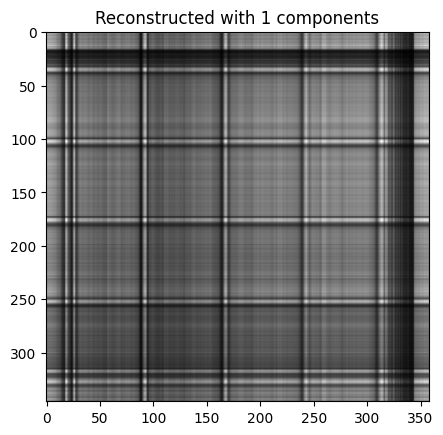

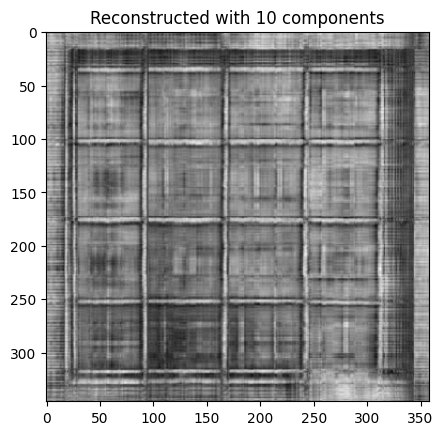

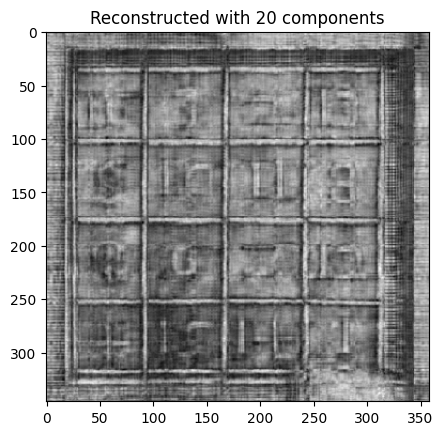

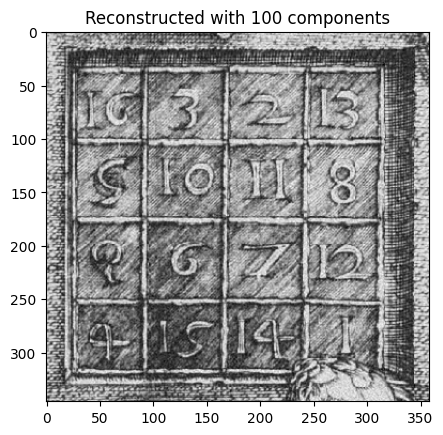

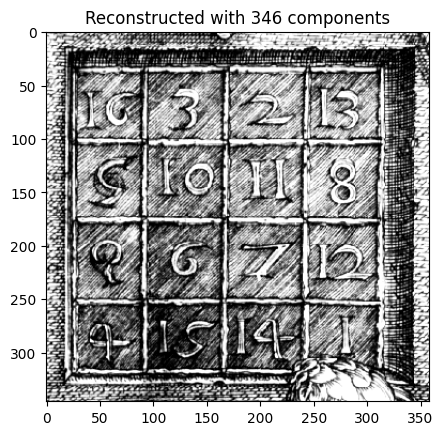

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# When U, sigma, VT are obtained from the SVD of the data
for d in [1, 10, 20, 100,len(data)]:
    # Create a diagonal matrix for the first 'd' singular values
    Sigma_d = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(Sigma_d, sigma[:d])

    # Reconstruct the matrix using the first 'd' components
    X_d = np.dot(U[:, :d], np.dot(Sigma_d[:d, :d], VT[:d, :]))

    # Plotting the reconstructed matrix
    plt.imshow(X_d, cmap='gray')
    plt.title(f'Reconstructed with {d} components')
    plt.show()
# print("WOW!")

The difference between 100 components and 300 components is bearly noticeable.

### (2) Reconstruction Error
To calculate the reconstruction error after performing a partial reconstruction with Singular Value Decomposition (SVD), we cac measure the difference between the original matrix and the reconstructed matrix.

A common way to do this is to use the Frobenius norm, which is essentially the square root of the sum of the absolute squares of the matrix elements.

The Frobenius norm of a matrix `A` is defined as:

$ \| A \|_F = \sqrt{\sum_{i,j} |a_{ij}|^2} $

where $( a_{ij} )$ are the elements of matrix `A`.

The reconstruction error is then the Frobenius norm of the difference between the original matrix and the reconstructed matrix:

$ \text{Reconstruction Error} = \| \text{Original Matrix} - \text{Reconstructed Matrix} \|_F $


Reconstruction error for 1 components: 96.32781011632783
Reconstruction error for 10 components: 76.62377197896427
Reconstruction error for 20 components: 67.40325792827265
Reconstruction error for 100 components: 31.142186827016243
Reconstruction error for 346 components: 3.4673102495238593e-13


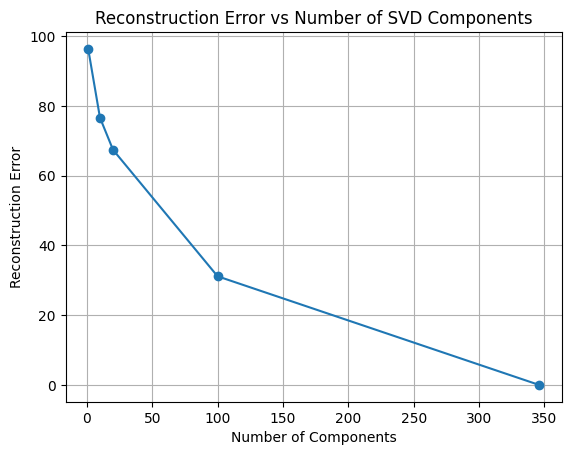

In [17]:
def reconstruction_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed, 'fro')

# Assuming U, sigma, VT are obtained from the SVD of your data, and 'data' is the original matrix
errors = []
for d in [1, 10, 20, 100,len(mat['mat'])]:
    # Create a diagonal matrix for the first 'd' singular values
    Sigma_d = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(Sigma_d, sigma[:d])

    # Reconstruct the matrix using the first 'd' components
    X_d = np.dot(U[:, :d], np.dot(Sigma_d[:d, :d], VT[:d, :]))

    # Calculate the reconstruction error
    error = reconstruction_error(data, X_d)
    errors.append((d, error))

# Print the errors for each number of components
for d, error in errors:
    print(f"Reconstruction error for {d} components: {error}")

import matplotlib.pyplot as plt

# Collecting reconstruction errors
ds = [1, 10, 20, 100,len(mat['mat'])]
errors = []

for d in ds:
    # Create a diagonal matrix for the first 'd' singular values
    Sigma_d = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(Sigma_d, sigma[:d])

    # Reconstruct the matrix using the first 'd' components
    X_d = np.dot(U[:, :d], np.dot(Sigma_d[:d, :d], VT[:d, :]))

    # Calculate and store the reconstruction error
    errors.append(reconstruction_error(data, X_d))

# Plotting the errors
plt.plot(ds, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Number of SVD Components')
plt.grid(True)
plt.show()

### Calculating Compression Rate using SVD

The Compression Rate can be defined as the ratio of the size of the compressed data to the size of the original data. Given an original matrix $X$  of size $m$ times $n$ , and its SVD components $U_d$, $S_d$, and $V_d^T$, the formula for the Compression Rate (CR) is:

$\text{CR} = \frac{\text{Size of Compressed Data}}{\text{Size of Original Data}} $

Where:

- The Size of Original Data $ = m \times n $
- The Size of Compressed Data $ = (m \times d) + d + (d \times n) $
  - $ m \times d $ is the size of $ U_d $
  - $ d $ is the number of singular values in $ S_d $ (as it's a diagonal matrix, only the diagonal elements are stored)
  - $ d \times n $ is the size of $ V_d^T $

Thus, the formula in LaTeX would be:

$ \text{CR} = \frac{(m \times d) + d + (d \times n)}{m \times n} $

This succinctly captures the essence of how compression rate is calculated in the context of SVD. It's a useful way to represent the balance between data reduction and retention of information, a key concept in data science.

Compression rate for 1 components: 0.005691542609875028
Compression rate for 10 components: 0.056915426098750284
Compression rate for 20 components: 0.11383085219750057
Compression rate for 100 components: 0.5691542609875029


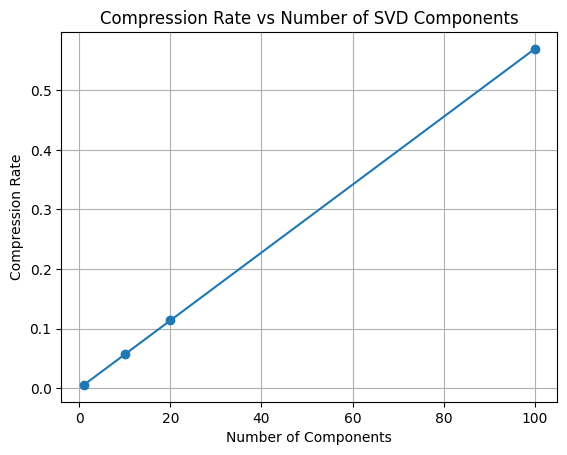

In [21]:
def calculate_compression_rate(original_matrix, U_d, S_d, VT_d):
    original_size = np.prod(original_matrix.shape)
    compressed_size = (U_d.shape[0] * U_d.shape[1]) + len(S_d) + (VT_d.shape[0] * VT_d.shape[1])
    return compressed_size / original_size

# Assuming 'data' is your original matrix
compression_rates = []
ds = [1, 10, 20, 100]
for d in ds:
    U_d = U[:, :d]
    S_d = sigma[:d]
    VT_d = VT[:d, :]

    rate = calculate_compression_rate(data, U_d, S_d, VT_d)
    print(f"Compression rate for {d} components: {rate}")
    compression_rates.append(rate)

# Print the compression rates for each number of components

import matplotlib.pyplot as plt
# Plotting the compression rates
plt.plot(ds, compression_rates, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Compression Rate')
plt.title('Compression Rate vs Number of SVD Components')
plt.grid(True)
plt.show()

We can clearly se that the compression rate grows linearly as the dimension of the components grows.